In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp, Statevector, Pauli, StabilizerState, DensityMatrix, partial_trace
from qiskit.primitives import Estimator, Sampler
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

from collections import defaultdict

import numpy as np
import random
import matplotlib.pyplot as plt

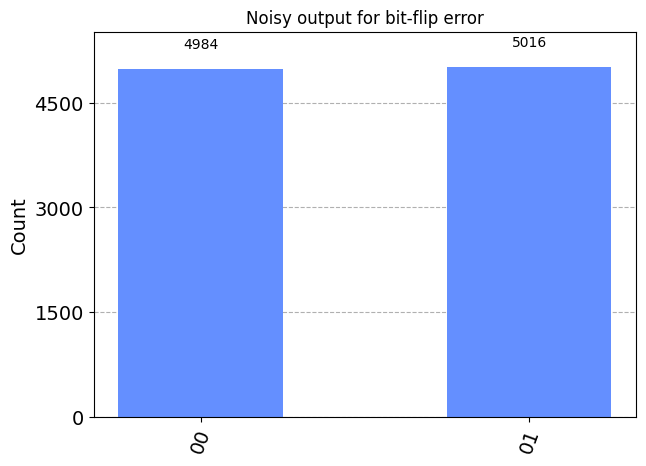

In [ ]:
qc = QuantumCircuit(2, 2) 

# create a Bell state
qc.h(0)
qc.cx(0, 1)
qc.h(0)

#measure qubits 
qc.measure(0, 0)

# Run the simulation and get counts
# Create noisy simulator backend
sim_noise = AerSimulator()

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=0, backend=sim_noise)
circ_tnoise = passmanager.run(qc)

# Run the simulation and get counts
result_bit_flip = sim_noise.run(circ_tnoise, shots=10000).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip, title="Noisy output for bit-flip error")